# Pymaceuticals Inc.
---

### Analysis

- Both Capomulin and Ramicane look to have the lowest final tumor volumes when compared to Infubinol and Ceftamin (per the "Boxplot of Final Tumor Volume per Drug Regimen" chart). However, when looking at "Observed Mouse Timepoints per Drug Regimen" bar charts, Capomulin and Ramicane had roughly 50 more observed timepoints despite all 4 drug regimens have 25 mice each (shown under "Quartiles, Outliers & Boxplots". As a result, while it is possible for Capomulin and Ramicane to be more effective drugs at decreasing tumor volume in comparison to Infubinol and Ceftamin, it is also possible that Capomulin and Ramicane had a final timepoint that was greater than Infubinol or Ceftamin. Finally, in mice treated with Capomulin, mouse weight and average tumor volume had a strong positive correlation.
 

In [1]:
# Data Science Libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Regression/Modelling Libraries
from scipy.stats import linregress

In [2]:
# Add Data Files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
comb_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
comb_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Check number of mice
comb_df["Mouse ID"].nunique()

249

In [4]:
# Find the duplicate mouse by ID number and Timepoint
comb_df[comb_df.duplicated(["Mouse ID", "Timepoint"])] # Got this from: https://www.geeksforgeeks.org/find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns/

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by removing the duplicate mouse (by its ID)
filt = comb_df["Mouse ID"] != "g989" # Making a filter so all mice that don't have the Mouse ID g989 will be kept
df = comb_df[filt]

In [6]:
# Number of mice in clean DataFrame
df["Mouse ID"].nunique()

248

# Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Groupby Drug Regimen and find Mean, Median, Variance, Std. Dev. and Standard Error for the Tumor Volume
tum_mean = df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
tum_med = df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tum_var = df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tum_stdv = df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tum_sem = df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

data = {
    "Mean Tumor Volume": tum_mean,
    "Median Tumor Volume": tum_med,
    "Tumor Volume Variance": tum_var,
    "Tumor Volume Std. Dev.": tum_stdv,
    "Tumor Volume Std. Err.": tum_sem
}

summary_statistics = pd.DataFrame(data)
summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Bar and Pie Charts

<Axes: title={'center': 'Observed Mouse Timepoints per Drug Regimen'}, xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

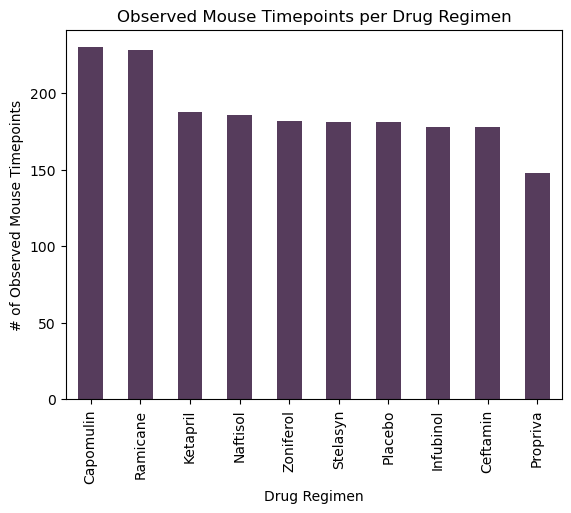

In [8]:
# Pandas bar chart
# Because we need to get a count of each row, making a bar chart of the value counts per each Drug Regimen is best
df["Drug Regimen"].value_counts().plot(kind="bar", ylabel="# of Observed Mouse Timepoints", title="Observed Mouse Timepoints per Drug Regimen",
                                      color="#563C5C")

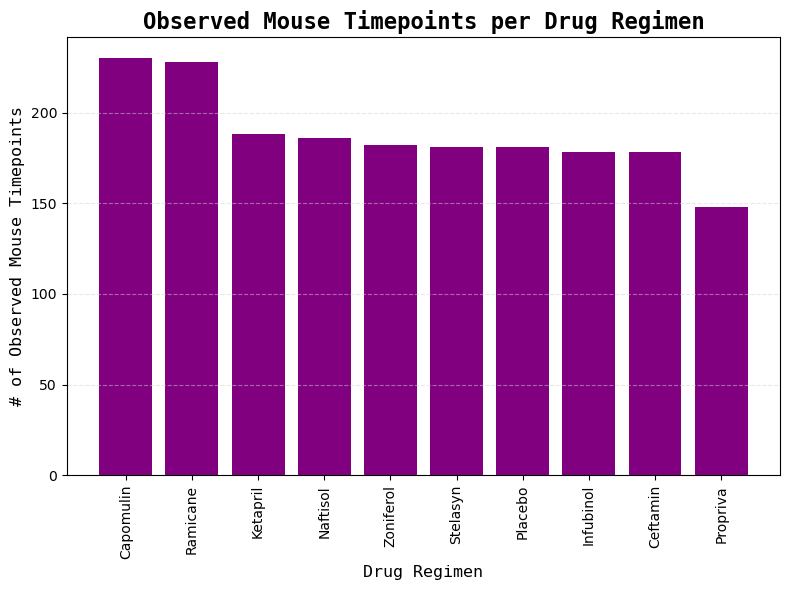

In [9]:
# Pyplot bar chart
# Step 1: Get the data
# Turn Value Counts into a DataFrame to be graphed
df1 = pd.DataFrame(df["Drug Regimen"].value_counts())
x = df1.index
y = df1["count"]
		
# Step 2: Create the Canvas
plt.figure(figsize=(8, 6))

# Step 3: Create Simple Graph
plt.bar(x, y, color = "purple")

# Step 4: Customization
plt.xlabel("Drug Regimen", fontsize=12, fontfamily="monospace")
plt.ylabel("# of Observed Mouse Timepoints", fontsize=12,  fontfamily="monospace")
plt.title("Observed Mouse Timepoints per Drug Regimen", fontsize=16, fontweight="bold", fontfamily="monospace")
plt.xticks(rotation=90)

plt.grid(axis="y", color="lightgrey", linestyle="--", alpha=0.5)

# Step 5: Show/Save the graph
plt.tight_layout()
plt.savefig("Observed Mouse Timepoints per Drug Regimen-Pyplot Bar Chart.png")
plt.show()

<Axes: title={'center': 'Distribution of Male and Female Mice'}, ylabel='count'>

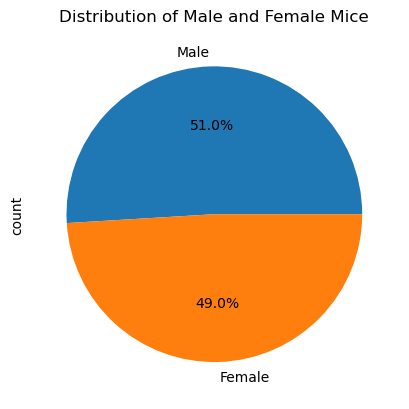

In [10]:
# Pandas pie chart; male vs. female mice
df["Sex"].value_counts().plot.pie(autopct="%1.1f%%", title="Distribution of Male and Female Mice")

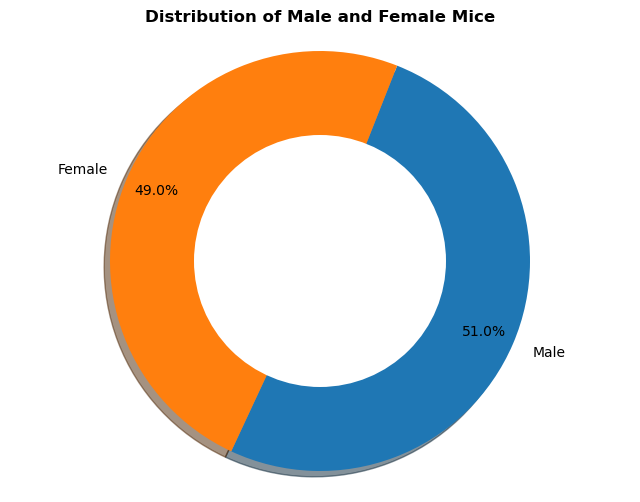

In [11]:
# Pyplot pie chart; Chose to do a donut chart
# Step 1: Get the data
labels =["Male", "Female"]
sex =  df["Sex"].value_counts()

# Step 2: Make the canvas
plt.figure(figsize=(8,6))

# Step 3: Make the barebones plot; 
plt.pie(sex, labels=labels, autopct="%1.1f%%", shadow=True, startangle=245, pctdistance=0.85)

# Step 3.5: Add in the donut hole
# Create the circle
center_circle = plt.Circle((0,0), 0.60, fc="white")
fig = plt.gcf()

# Adding Circle in Pie Chart
fig.gca().add_artist(center_circle)

# Step 4: Customization
plt.title("Distribution of Male and Female Mice", fontweight="bold")
plt.axis("equal") # Centers it

# Step 5:
plt.savefig("Distribution of Male and Female Mice-Donut Chart.png")
plt.show()

# Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
maxtime = df.groupby("Mouse ID").Timepoint.max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# Used Inner Join on both Mouse ID and Timepoint to ensure only rows with the the last timepoint were kept
# Because I'm creating a new dataframe, the index is being reset and doesn't need to be reset manually
max_df = pd.merge(maxtime, df, on=["Mouse ID","Timepoint"])
max_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [13]:
# shows the number of mice per each drug regimen; This is being used for the analysis
max_df.groupby("Drug Regimen")["Mouse ID"].count()

Drug Regimen
Capomulin    25
Ceftamin     25
Infubinol    25
Ketapril     25
Naftisol     25
Placebo      25
Propriva     24
Ramicane     25
Stelasyn     24
Zoniferol    25
Name: Mouse ID, dtype: int64

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
tx_group = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
cap = []
ram = []
inf = []
cef = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Got the following code with help from Xpert
for tx in tx_group:
    for index, row in max_df.iterrows():
        if row["Drug Regimen"] == "Capomulin" and tx == "Capomulin":
            cap.append(row["Tumor Volume (mm3)"])
        elif row["Drug Regimen"] == "Ramicane" and tx == "Ramicane":
            ram.append(row["Tumor Volume (mm3)"])
        elif row["Drug Regimen"] == "Infubinol" and tx == "Infubinol":
            inf.append(row["Tumor Volume (mm3)"])
        elif row["Drug Regimen"] == "Ceftamin" and tx == "Ceftamin":
            cef.append(row["Tumor Volume (mm3)"])

# Q3 and Q1 for Capomulin; with help from Xpert and https://www.geeksforgeeks.org/how-to-use-pandas-filter-with-iqr/
q3cap = np.quantile(cap, 0.75)
q1cap = np.quantile(cap, 0.25)
iqrcap = q3cap - q1cap

lower_cap = q1cap - 1.5*iqrcap
upper_cap = q3cap + 1.5*iqrcap

cap_outliers = []


for x in cap:
    if x < lower_cap or x > upper_cap:
        cap_outliers.append(x)
        
print("Capolulin's IQR:", iqrcap, "\nCapomulin's potential outliers:", cap_outliers)

# Q3 and Q1 for Ramicane; with help from Xpert and https://www.geeksforgeeks.org/how-to-use-pandas-filter-with-iqr/
q3ram = np.quantile(ram, 0.75)
q1ram = np.quantile(ram, 0.25)
iqrram = q3ram - q1ram

lower_ram = q1ram - 1.5*iqrram
upper_ram = q3ram + 1.5*iqrram

ram_outliers = []

for x in ram:
    if x < lower_ram or x > upper_ram:
        ram_outliers.append(x)
        
print("Ramicane's IQR:", iqrram, "\nRamicane's potential outliers:", ram_outliers)

# Q3 and Q1 for Infubinol; with help from Xpert and https://www.geeksforgeeks.org/how-to-use-pandas-filter-with-iqr/
q3inf = np.quantile(inf, 0.75)
q1inf = np.quantile(inf, 0.25)
iqrinf = q3inf - q1inf

lower_inf = q1inf - 1.5*iqrinf
upper_inf = q3inf + 1.5*iqrinf

inf_outliers = []

for x in inf:
    if x < lower_inf or x > upper_inf:
        inf_outliers.append(x)
        
print("Infubinol's IQR:", iqrinf, "\nInfubinol's potential outliers:", inf_outliers)

# Q3 and Q1 for Ceftamin; with help from Xpert and https://www.geeksforgeeks.org/how-to-use-pandas-filter-with-iqr/
q3cef = np.quantile(cef, 0.75)
q1cef = np.quantile(cef, 0.25)
iqrcef = q3cef - q1cef

lower_cef = q1cef - 1.5*iqrcef
upper_cef = q3cef + 1.5*iqrcef

cef_outliers = []

for x in cef:
    if x < lower_cef or x > upper_cef:
        cef_outliers.append(x)
        
print("Ceftamin's IQR:", iqrcef, "\nCeftamin's potential outliers:", cef_outliers)

Capolulin's IQR: 7.781863460000004 
Capomulin's potential outliers: []
Ramicane's IQR: 9.098536719999998 
Ramicane's potential outliers: []
Infubinol's IQR: 11.477135160000003 
Infubinol's potential outliers: [36.3213458]
Ceftamin's IQR: 15.577752179999997 
Ceftamin's potential outliers: []


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 2000x1200 with 0 Axes>

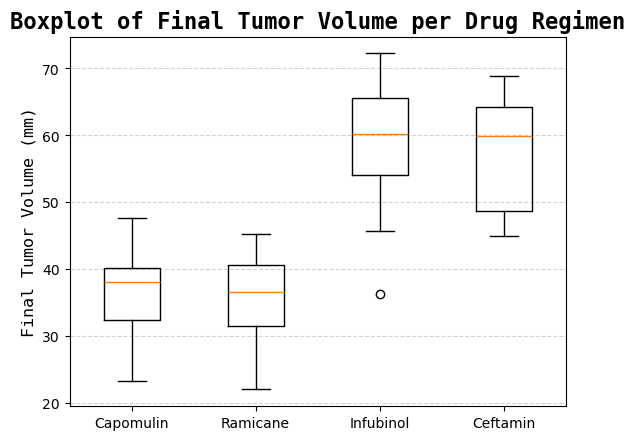

In [15]:
# Box plot that shows the distribution of the tumor volume for each treatment group using Matplotlib
# Created a dictionary and then used it to create subplots with help from Diziet Asahi on https://stackoverflow.com/a/52274064/23471668
dict = {"Capomulin": cap, "Ramicane": ram, "Infubinol": inf, "Ceftamin": cef}

# Step 2: Create the Canvas
plt.figure(figsize=(20,12))

# Step 3: Create a basic plot
fig, ax = plt.subplots()
ax.boxplot(dict.values())

# Step 4: Customize
plt.ylabel("Final Tumor Volume (mm)", fontsize=12, fontfamily="monospace")
plt.title("Boxplot of Final Tumor Volume per Drug Regimen", fontsize=16, fontfamily="monospace", fontweight="bold")

plt.grid(color="lightgray", axis="y", linestyle="--")
plt.xticks([1, 2, 3, 4], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])


# Step 5: Show and Save
plt.savefig("Boxplot of Final Tumor Volume per Drug Regimen.png")
plt.show

# Line and Scatter Plots

In [16]:
# Creating a new dataframe that only include Capomulin data
filt = df["Drug Regimen"] == "Capomulin"
df_cap = df.loc[filt]

C:\Users\Marta\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Marta\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<function matplotlib.pyplot.show(close=None, block=None)>

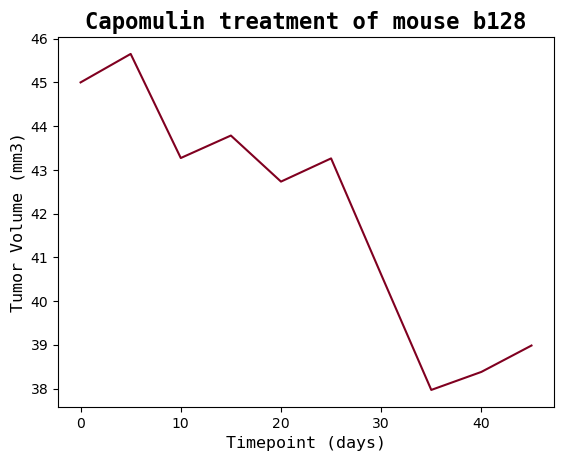

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Creating a new dataframe for a new mouse; this can be changed for any mouse treated with Capomulin
mouse = "b128"
filt = df["Mouse ID"] == mouse
sub = df.loc[filt]

# Get Data
x=sub.Timepoint
y=sub["Tumor Volume (mm3)"]

# Create the plot
sns.lineplot(x=x, y=y, color="#800020")

# Customize
plt.title(f"Capomulin treatment of mouse {mouse}", fontfamily="monospace", fontsize=16, fontweight="bold")
plt.xlabel("Timepoint (days)", fontfamily="monospace", fontsize=12)
plt.ylabel("Tumor Volume (mm3)", fontfamily="monospace", fontsize=12)

# Show Chart
plt.savefig(f"Capomulin treatment of mouse {mouse}.png")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

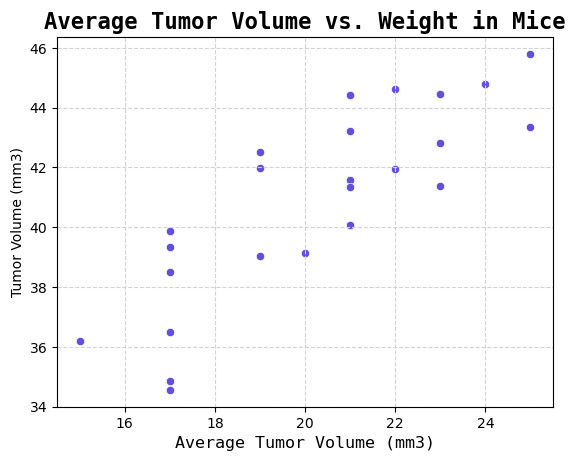

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Seaborn; 
# Step 1: Get the Data
x = df_cap.groupby("Mouse ID")["Weight (g)"].unique().astype("int64") # Mouse Weight (.unique() results in object, so needs to be cast to an int)
y = df_cap.groupby("Mouse ID")["Tumor Volume (mm3)"].mean() # Average Tumor Volume

# Step 2: Create the plot
sns.scatterplot(x=x, y=y, color="#6050DC") 

# Step 3: Customize
plt.title("Average Tumor Volume vs. Weight in Mice", fontsize=16, fontfamily="monospace", fontweight="bold")
plt.xlabel("Weight (g)", fontsize=12, fontfamily="monospace")
plt.xlabel("Average Tumor Volume (mm3)", fontsize=12, fontfamily="monospace")

plt.grid(color="lightgray", linestyle="--")

# Step 4: Show and Save
plt.savefig("Average Tumor Volume vs. Weight in Mice-Scatterplot.png")
plt.show

# Correlation and Regression

The correlation between mouse weight and the average tumor volume is: 0.8419363424694721


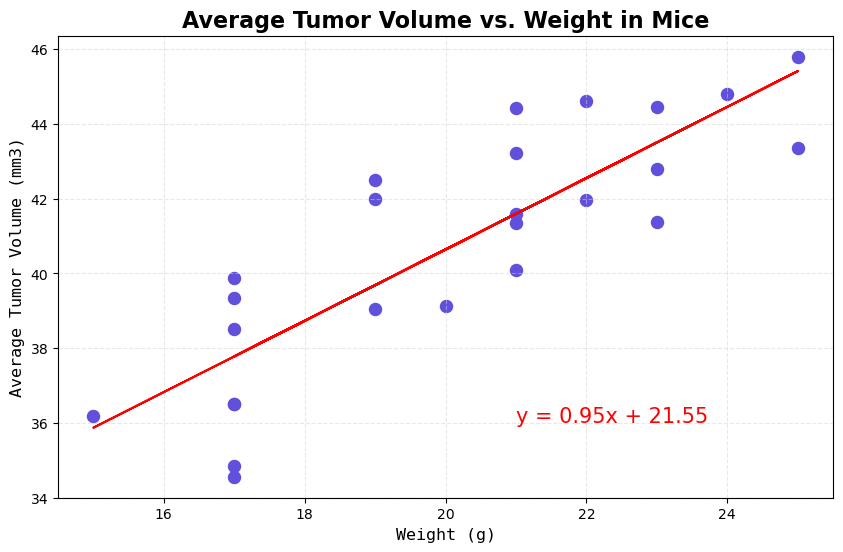

In [19]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# x and y values copied from the scatter plot above
x_values = df_cap.groupby("Mouse ID")["Weight (g)"].unique().astype("int64")
y_values = df_cap.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()


# Makes the line of best fit
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept # calculate the predictions
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# make the plot
# Make the canvas
plt.figure(figsize=(10,6))

# Make the basic plot
plt.scatter(x_values,y_values, color="#6050DC", s=75)
plt.plot(x_values,regress_values,"r-")

# Customizations
plt.xlabel("Weight (g)", fontsize=12, fontfamily="monospace")
plt.ylabel("Average Tumor Volume (mm3)", fontsize=12, fontfamily="monospace")
plt.title("Average Tumor Volume vs. Weight in Mice", fontweight="bold", fontsize=16)
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

plt.annotate(line_eq,(21,36),fontsize=15,color="red")


print(f"The correlation between mouse weight and the average tumor volume is: {rvalue}")
plt.savefig("Average Tumor Volume vs. Weight in Mice with line of best fit.png")
plt.show()